# Macroeconomics project

# Task 2

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
from statsmodels.tsa.stattools import ccf

### Load acquired data

In [2]:
data = pd.read_csv('macro.csv').set_index('date')

### Drop unnesessary column

In [3]:
data = data.drop(columns=['Time'])

### Derive columns to use further

In [4]:
columns = ['GDP', 'Consumption', 'GDP Implicit Price Deflator inflation',
           'CPI less food and energy', 'Total CPI', 'GPDI', 'Inventories',
           'WILL5000PRFC']

### Filter data as it was in the article

In [5]:
for i in columns:
    data[f'{i} filtered'] = sm.tsa.filters.bkfilter(data[f'{i}'].dropna(), 6, 40, 8)
data.tail()

,GDP,Consumption,GDP Implicit Price Deflator inflation,CPI less food and energy,Total CPI,GPDI,Inventories,WILL5000PRFC,GDP filtered,Consumption filtered,GDP Implicit Price Deflator inflation filtered,CPI less food and energy filtered,Total CPI filtered,GPDI filtered,Inventories filtered,WILL5000PRFC filtered
date,,,,,,,,,,,,,,,,
2021-07-01,23550.420,16147.297,6.2,2.442802,0.287313,4109.122,3239.884,45986.152188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,24349.121,16517.976,6.8,3.238340,0.388553,4499.171,3394.375,47478.708594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,24740.480,16874.769,8.4,4.277553,0.532822,4671.027,3611.694,45005.218065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,25248.476,17261.338,9.1,5.041692,0.609753,4609.927,3777.222,40965.785000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,6.004582,0.581922,NaN,NaN,39735.978281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look through new filtered columns

In [6]:
data.columns

Index(['GDP', 'Consumption', 'GDP Implicit Price Deflator inflation',
       'CPI less food and energy', 'Total CPI', 'GPDI', 'Inventories',
       'WILL5000PRFC', 'GDP filtered', 'Consumption filtered',
       'GDP Implicit Price Deflator inflation filtered',
       'CPI less food and energy filtered', 'Total CPI filtered',
       'GPDI filtered', 'Inventories filtered', 'WILL5000PRFC filtered'],
      dtype='object')

### Generate plots

In [ ]:
def visualize_plots(data, cols, suptitle=''):
    fig, axs = plt.subplots(4, 2, figsize=(24, 18))
    plt.suptitle(suptitle, fontsize=30)
    counter = 0
    for i in range(0, 4):
        for j in range(0, 2):
            if counter == len(cols):
                break
            col = cols[counter]
            plt.subplot(axs[i][j])
            plt.title(f'Business cycle component of {cols[counter]}')
            plt.plot(data[f'{cols[counter]} filtered'])
            counter += 1

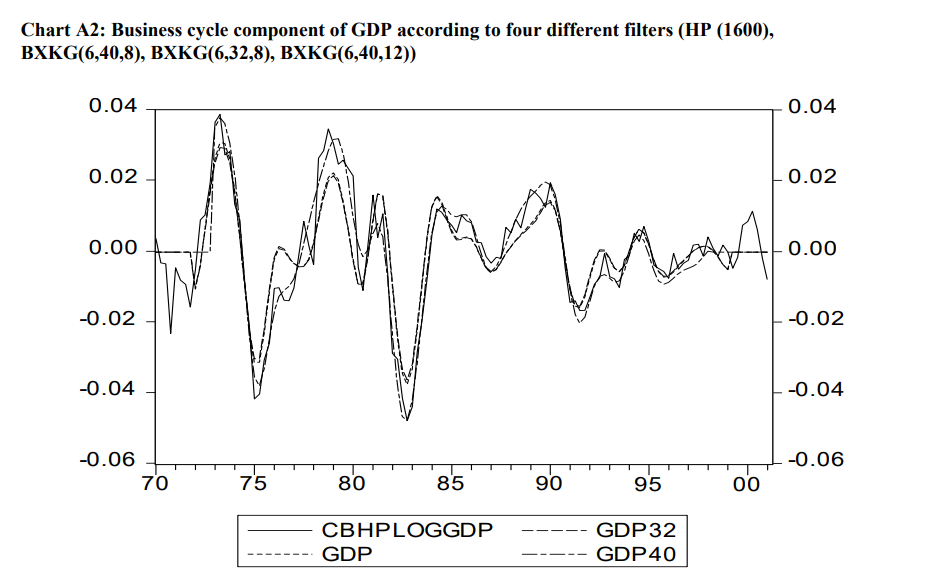

In [ ]:
visualize_plots(data, columns, 'Business cycle components')

### Function to count cross correlation

In [21]:
def count_ccf(data, xlabel, ylabel):
    '''
    Function to count cross correlation between two factors with lag 4
    '''
    
    data = data[(data.index>'1969-12-01')&(data.index<'2001-01-01')].copy()
    
    forwards = ccf(data[xlabel], data[ylabel], adjusted=False)
    backwards = ccf(data[xlabel][::-1], data[ylabel][::-1], adjusted=False)[::-1]
    ccf_output = np.r_[backwards[-5:-1], forwards[:5]]

    return ccf_output

### Derive columns to use for final table

In [48]:
cols_to_use = [col for col in data.columns if 'filtered' in col]

### Calculate cross correlations with GDP and other factors and get the final table

In [75]:
results = []

for col in cols_to_use:
    ser = pd.Series(count_ccf(data, 'GDP filtered', col), name=col, index=range(-4, 5))
    results.append(ser)

final_table = pd.concat(results, axis=1).T

col_names = list(zip(['Cross correlation with GDP(t+k)' for i in range(9)], [-4, -3, -2, -1, 0, 1, 2, 3, 4]))
final_table.columns = pd.MultiIndex.from_tuples(col_names)
final_table.index.name = 'variables (t)'

final_table

Cross correlation with GDP(t+k)  \
                                                                            -4   
variables (t)                                                                    
GDP filtered                                                         -0.130993   
Consumption filtered                                                 -0.031273   
GDP Implicit Price Deflator inflation filtered                        0.007351   
CPI less food and energy filtered                                     0.289940   
Total CPI filtered                                                    0.103266   
GPDI filtered                                                        -0.233664   
Inventories filtered                                                  0.154311   
WILL5000PRFC filtered                                                      NaN   

                                                                              \
                                                      -3        -2        -1   
variables (t)                                                                  
GDP filtered                                    0.201487  0.569289  0.867570   
Consumption filtered                            0.200986  0.474852  0.715516   
GDP Implicit Price Deflator inflation filtered  0.068960  0.134905  0.197690   
CPI less food and energy filtered               0.312697  0.264459  0.160750   
Total CPI filtered                              0.219795  0.300261  0.311506   
GPDI filtered                                   0.112190  0.486566  0.783097   
Inventories filtered                            0.412232  0.621095  0.725443   
WILL5000PRFC filtered                                NaN       NaN       NaN   

                                                                              \
                                                       0         1         2   
variables (t)                                                                  
GDP filtered                                    1.000000  0.867570  0.569289   
Consumption filtered                            0.843222  0.742144  0.517365   
GDP Implicit Price Deflator inflation filtered  0.245093  0.252488  0.227389   
CPI less food and energy filtered               0.038145 -0.063163 -0.112870   
Total CPI filtered                              0.245078  0.121947 -0.004694   
GPDI filtered                                   0.912355  0.791697  0.521740   
Inventories filtered                            0.696332  0.482049  0.228867   
WILL5000PRFC filtered                                NaN       NaN       NaN   

                                                                    
                                                       3         4  
variables (t)                                                       
GDP filtered                                    0.201487 -0.130993  
Consumption filtered                            0.234739 -0.031671  
GDP Implicit Price Deflator inflation filtered  0.172061  0.096470  
CPI less food and energy filtered              -0.110737 -0.080599  
Total CPI filtered                             -0.091092 -0.115335  
GPDI filtered                                   0.206735 -0.055430  
Inventories filtered                           -0.002700 -0.173884  
WILL5000PRFC filtered                                NaN       NaN

### Table from the article

![alt text](https://user-images.githubusercontent.com/9265326/188273084-eb1b5f85-bbfe-4704-9701-8a10aecf5b8f.png)

-----